In [1]:
import pandas as pd

mmp_data = pd.read_excel('MMP_transactionDatewise.xlsx')
mmp_data = mmp_data[:-19] # This step is done to remove the discrepancy in the data.
mmp_data.head()

,STDDate,Project Name,State,Standard Service,TotalCount,Transaction(in Lakhs)
0,2013-01-01,Agriculture,Maharashtra,Agriculture & Allied,1599,0.01599
1,2013-01-01,Agriculture,Odisha,Licenses and Permits,1,0.00001
2,2013-01-01,Agriculture,Uttar Pradesh,Agriculture & Allied,98,0.00098
3,2013-01-01,Agriculture,West Bengal,Licenses and Permits,9,0.00009
4,2013-01-01,Commercial Taxes,Andhra Pradesh,Commercial Tax,62205,0.62205


In [2]:
education = {'Date': [], 'Count': []}
for i in range(0, len(mmp_data)):
    if (mmp_data['Project Name'][i] == 'CSC' and
       mmp_data['Standard Service'][i] == 'Education'):
        if (len(education['Date']) == 0 or
           education['Date'][-1] != mmp_data['STDDate'][i]):
            education['Date'].append(mmp_data['STDDate'][i])
            education['Count'].append(mmp_data['TotalCount'][i])
        else:
            education['Count'][-1] += mmp_data['TotalCount'][i]

In [3]:
education_data = pd.DataFrame(data=education)
education_data.head()

,Date,Count
0,2013-01-01,4
1,2013-01-03,2
2,2013-01-04,6
3,2013-01-07,1
4,2013-01-09,1


In [4]:
education_data.index = education_data.Date
education_data.drop('Date', axis=1, inplace=True)

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(education_data)

/home/pd/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


# Linear Regression

In [10]:
new_data = pd.DataFrame(index=range(0,len(education_data)),columns=['Date', 'Count'])
for i in range(0,len(education_data)):
    new_data['Date'][i] = education['Date'][i]
    new_data['Count'][i] = education['Count'][i]
new_data.head()

,Date,Count
0,2013-01-01 00:00:00,4
1,2013-01-03 00:00:00,2
2,2013-01-04 00:00:00,6
3,2013-01-07 00:00:00,1
4,2013-01-09 00:00:00,1


In [7]:
from fastai.tabular import  add_datepart

In [11]:
add_datepart(new_data, 'Date')
new_data.drop(['Elapsed', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'], axis=1, inplace=True)
new_data.head()

,Count,Year,Month,Week,Day,Dayofweek,Dayofyear
0,4,2013,1,1,1,1,1
1,2,2013,1,1,3,3,3
2,6,2013,1,1,4,4,4
3,1,2013,1,2,7,0,7
4,1,2013,1,2,9,2,9


In [13]:
train_size = int(0.90 * len(new_data))
print(train_size)

1742


In [14]:
train = new_data[:train_size]
test = new_data[train_size:]

x_train = train.drop('Count', axis=1)
y_train = train['Count']
x_test = test.drop('Count', axis=1)
y_test = test['Count']

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
import numpy as np
predictions = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
print(rms)

7378.876176370612


/home/pd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


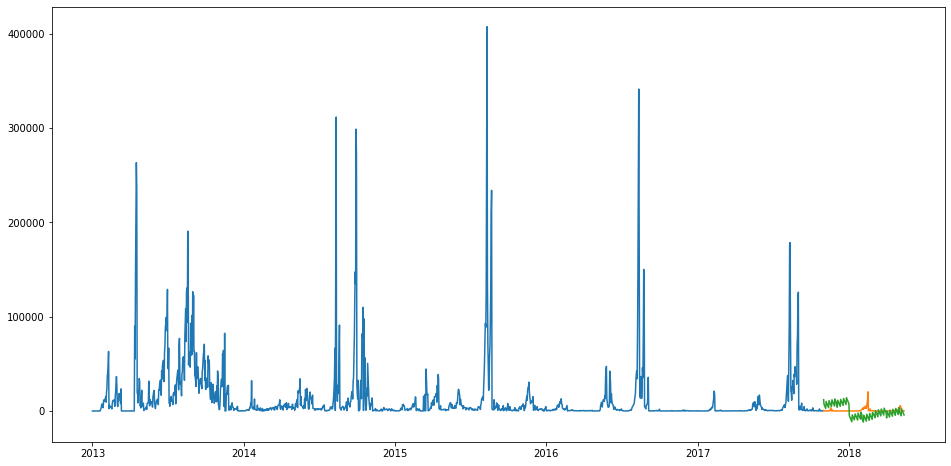

In [18]:
test['Predictions'] = predictions

test.index = education_data[train_size:].index
train.index = education_data[:train_size].index
plt.figure(figsize=(16,8))
plt.plot(train['Count'])
plt.plot(test[['Count', 'Predictions']])